<a href="https://colab.research.google.com/github/Megacity1/CartpoleDQN/blob/main/Week%203%20Deep%20RL%202/CartPoleDQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q Network (DQN) for CartPole Using Boltzmann Q Policy
This exercise implements a DQN for CartPole using a Boltzmann Q policy for selecting the actions

In [57]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

In [58]:
!pip install gym

In [59]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
!pip install Adam
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

Implementation of DQN for CartPole, applying policy BoltzmannQPolicy

##Implement DQN with BoltzmannGumbelQPolicy

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 4)                 0         
                                                                 
 dense_22 (Dense)            (None, 16)                80        
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 200 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


  34/200: episode: 1, duration: 2.513s, episode steps:  34, steps per second:  14, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.618 [0.000, 1.000],  loss: 0.621018, mae: 0.639914, mean_q: 0.034354, mean_eps: 0.867250
  72/200: episode: 2, duration: 0.305s, episode steps:  38, steps per second: 125, episode reward: 38.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.605 [0.000, 1.000],  loss: 0.554010, mae: 0.608151, mean_q: 0.186418, mean_eps: 0.763750
  87/200: episode: 3, duration: 0.132s, episode steps:  15, steps per second: 114, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: 0.539572, mae: 0.602387, mean_q: 0.377502, mean_eps: 0.644500
  99/200: episode: 4, duration: 0.119s, episode steps:  12, steps per second: 100, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.833 [0.000, 1.000],  loss: 0.553988, mae: 0.625578, mean_q: 0.521509, mean_eps: 0.583750
 114

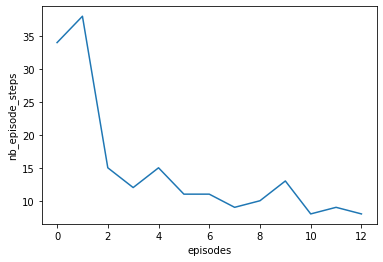

Testing for 20 episodes ...
Episode 1: reward: 9.000, steps: 9
Episode 2: reward: 9.000, steps: 9
Episode 3: reward: 9.000, steps: 9
Episode 4: reward: 10.000, steps: 10
Episode 5: reward: 9.000, steps: 9
Episode 6: reward: 9.000, steps: 9
Episode 7: reward: 9.000, steps: 9
Episode 8: reward: 10.000, steps: 10
Episode 9: reward: 10.000, steps: 10
Episode 10: reward: 8.000, steps: 8
Episode 11: reward: 10.000, steps: 10
Episode 12: reward: 9.000, steps: 9
Episode 13: reward: 9.000, steps: 9
Episode 14: reward: 9.000, steps: 9
Episode 15: reward: 9.000, steps: 9
Episode 16: reward: 10.000, steps: 10
Episode 17: reward: 9.000, steps: 9
Episode 18: reward: 8.000, steps: 8
Episode 19: reward: 9.000, steps: 9
Episode 20: reward: 11.000, steps: 11


In [61]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannGumbelQPolicy
from rl.policy import LinearAnnealedPolicy
from rl.policy import EpsGreedyQPolicy
from rl.agents.dqn import DQNAgent      # import the DQN agent

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=1,
                               value_min=.1, 
                               value_test=.05,
                               nb_steps=200)
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# add extra layers here
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space
print(model.summary())

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=25,
               target_model_update=1e-2, 
               policy=policy) 

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=200, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)